In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("서인천IC-부평IC 평균속도.csv", encoding='CP949')
df = df.drop(df.columns[0], axis=1)
df.columns = ["ds","y"]
df.head()

,ds,y
0,2021050100,98.63
1,2021050101,100.53
2,2021050102,99.86
3,2021050103,99.34
4,2021050104,93.64


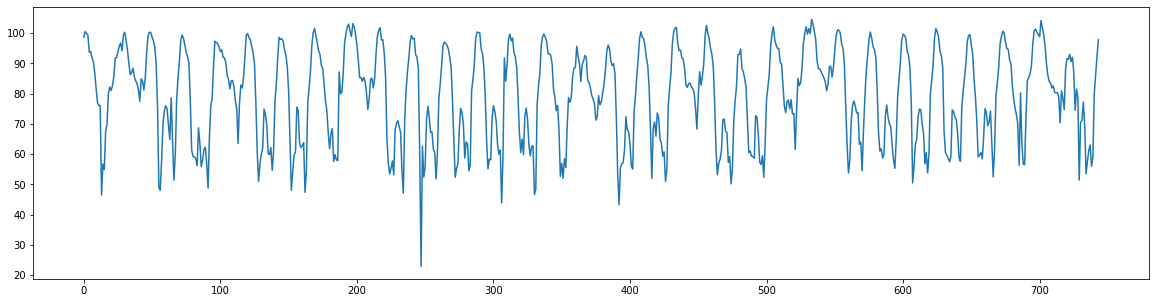

In [4]:
plt.figure(figsize=(20,5))
plt.plot(range(len(df["ds"])), df["y"])
plt.show()

In [5]:
df_train = df.iloc[:-24*7]

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 432x288 with 0 Axes>

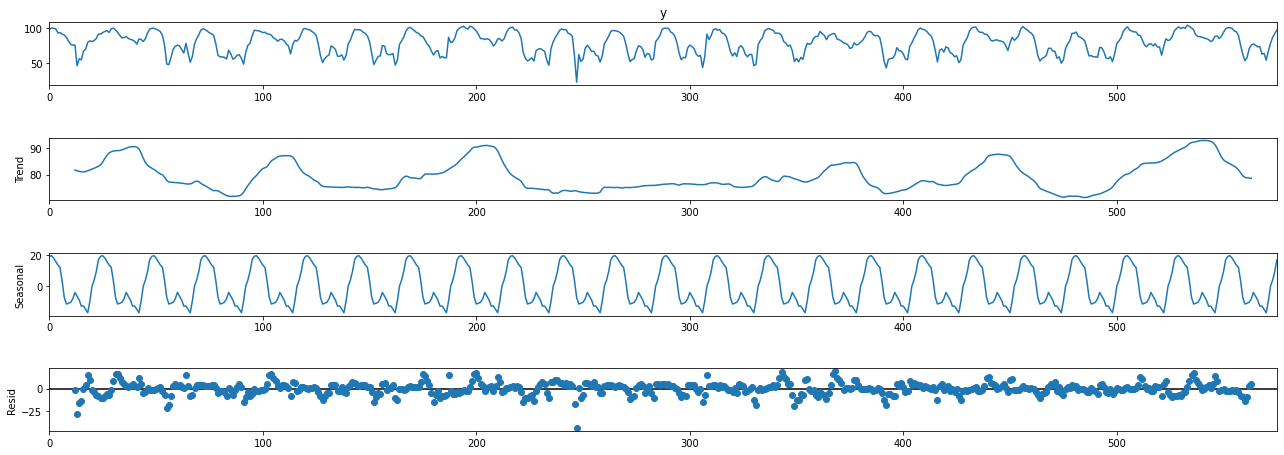

In [7]:
result = seasonal_decompose(df_train["y"], model="additive", period=24)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,7)
plt.show()

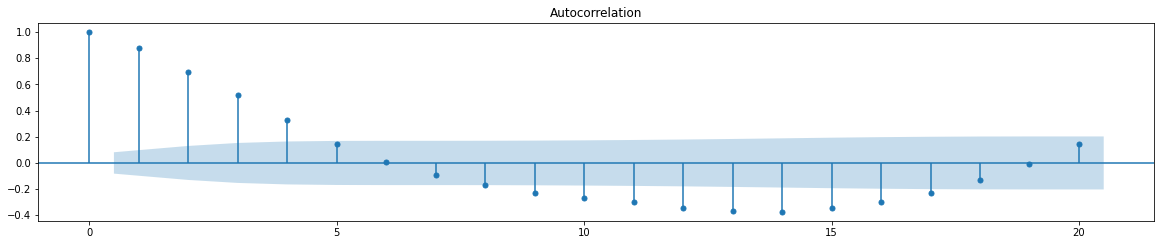

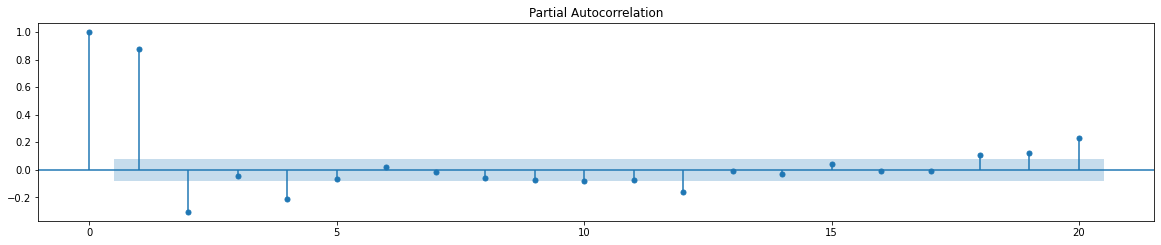

In [8]:
import statsmodels.api as sm
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_train["y"], lags=20, ax=ax1)

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_train["y"], lags=20, ax=ax1)

q=5, p=1

In [9]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
from tqdm import tqdm

# ARIMA

In [13]:
p = range(0,3)
d = range(1,2)
q = range(0,6)

pdq = list(itertools.product(p,d,q))

aic = []
params = []

with tqdm(total = len(pdq)) as pg:
    for i in pdq:
        pg.update(1)
        try:
            model = SARIMAX(df_train["y"], order=(i))
            model_fit = model.fit()
            # print("SARIMA:{}{}, AIC:{}".format(i,j, round(model_fit.aic,2)))
            aic.append(round(model_fit.aic,2))
            params.append((i))
        except:
            continue

 72%|███████▏  | 13/18 [00:04<00:03,  1.51it/s]/home/ubuntu/anaconda3/envs/doheon/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/ubuntu/anaconda3/envs/doheon/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 94%|█████████▍| 17/18 [00:05<00:00,  1.90it/s]/home/ubuntu/anaconda3/envs/doheon/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
100%|██████████| 18/18 [00:07<00:00,  1.42it/s]/home/ubuntu/anaconda3/envs/doheon/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likeli

In [18]:
optimal = [(params[i],j) for i,j in enumerate(aic) if j == min(aic)]
model_opt = ARIMA(df_train["y"], order = optimal[0][0])
model_opt_fit = model_opt.fit()
model_opt_fit.summary()

/home/ubuntu/anaconda3/envs/doheon/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  576
Model:                 ARIMA(2, 1, 4)   Log Likelihood               -1926.684
Date:                Fri, 30 Jul 2021   AIC                           3867.368
Time:                        13:43:14   BIC                           3897.849
Sample:                             0   HQIC                          3879.256
                                - 576                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7637      0.055     32.360      0.000       1.657       1.871
ar.L2         -0.8300      0.045    -18.570      0.000      -0.918      -0.742
ma.L1         -1.6578      0.072    -23.017      0.000      -1.799      -1.517
ma.L2          0.4530      0.072      6.270      0.000       0.311       0.595
ma.L3          0.3019      0.076      3.983      0.000       0.153       0.450
ma.L4         -0.0970      0.053     -1.834      0.067      -0.201       0.007
sigma2        47.1894      2.642     17.860      0.000      42.011      52.368
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               428.98
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.11
Prob(H) (two-sided):                  0.07   Kurtosis:                         7.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/home/ubuntu/anaconda3/envs/doheon/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


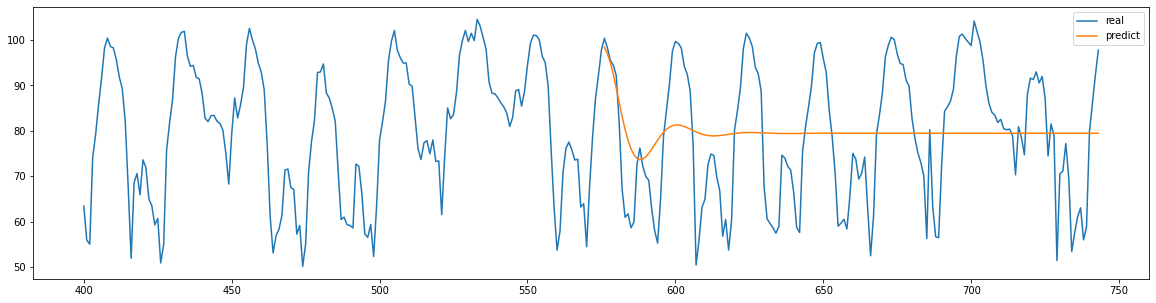

In [19]:
model = ARIMA(df_train["y"], order=optimal[0][0])
model_fit = model.fit()
forecast = model_fit.forecast(steps=24*7)

plt.figure(figsize=(20,5))
plt.plot(range(400,744), df["y"].iloc[400:], label="real")
plt.plot(forecast, label="predict")
plt.legend()
plt.show()

# SARIMAX

In [29]:
p = range(0,3)
d = range(1,2)
q = range(0,6)
m = 27*7

pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1], x[2], m) for x in list(itertools.product(p,d,q))]

aic = []
params = []

with tqdm(total = len(pdq) * len(seasonal_pdq)) as pg:
    for i in pdq:
        for j in seasonal_pdq:
            pg.update(1)
            try:
                model = SARIMAX(df_train["y"], order=(i), season_order = (j))
                model_fit = model.fit()
                # print("SARIMA:{}{}, AIC:{}".format(i,j, round(model_fit.aic,2)))
                aic.append(round(model_fit.aic,2))
                params.append((i,j))
            except:
                continue

 73%|███████▎  | 235/324 [01:11<00:07, 11.35it/s]/home/ubuntu/anaconda3/envs/doheon/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/ubuntu/anaconda3/envs/doheon/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 89%|████████▉ | 289/324 [01:34<00:30,  1.14it/s]/home/ubuntu/anaconda3/envs/doheon/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
 90%|████████▉ | 290/324 [01:35<00:35,  1.03s/it]/home/ubuntu/anaconda3/envs/doheon/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum 

In [30]:
optimal = [(params[i],j) for i,j in enumerate(aic) if j == min(aic)]
model_opt = SARIMAX(df_train["y"], order = optimal[0][0][0], seasonal_order = optimal[0][0][1])
model_opt_fit = model_opt.fit()
model_opt_fit.summary()

/home/ubuntu/anaconda3/envs/doheon/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  576
Model:             SARIMAX(2, 1, 4)x(0, 1, [], 168)   Log Likelihood               -1363.194
Date:                              Fri, 30 Jul 2021   AIC                           2740.389
Time:                                      14:27:10   BIC                           2768.451
Sample:                                           0   HQIC                          2751.494
                                              - 576                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1597      0.082      1.947      0.052      -0.001       0.321
ar.L2         -0.8813      0.080    -10.968      0.000      -1.039      -0.724
ma.L1         -0.5547      0.081     -6.868      0.000      -0.713      -0.396
ma.L2          0.6510      0.096      6.786      0.000       0.463       0.839
ma.L3         -0.2962      0.048     -6.146      0.000      -0.391      -0.202
ma.L4         -0.3278      0.041     -8.090      0.000      -0.407      -0.248
sigma2        47.4858      1.964     24.181      0.000      43.637      51.335
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               477.95
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

0.013710737228393555


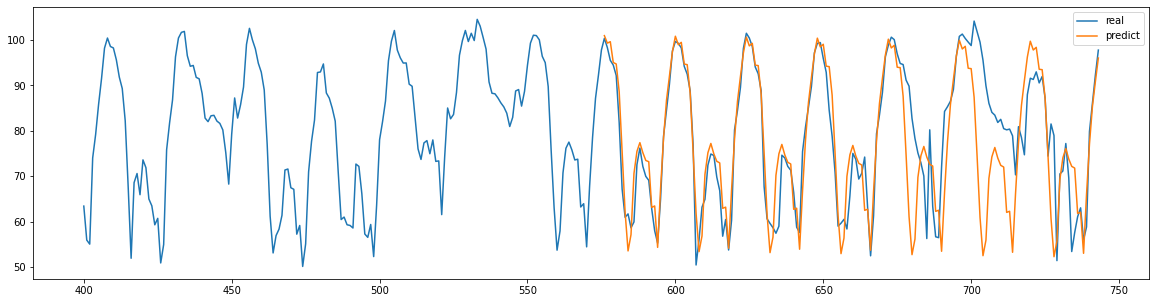

In [14]:
model = SARIMAX(df_train["y"], order=optimal[0][0][0], seasonal_order=optimal[0][0][1])
model_fit = model.fit(disp=0)
forecast = model_fit.forecast(steps=24*7)

plt.figure(figsize=(20,5))
plt.plot(range(400,744), df["y"].iloc[400:], label="real")
plt.plot(forecast, label="predict")
plt.legend()
plt.show()

In [33]:
def MAPEval(y_pred, y_true):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPEval(forecast, df["y"].iloc[-24*7:])

8.748684216744659

In [117]:
from pmdarima.arima import auto_arima

In [124]:
auto_arima_model = auto_arima(df["y"], start_p=1, start_q = 1, max_p=3, max_q=3, m=24, seasonal=True, d=1, D=1, max_P=3, max_Q=3, trace=True, error_action='ignore', suppress_warnings=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[24]             : AIC=5094.371, Time=0.09 sec
 ARIMA(0,1,0)(0,1,1)[24]             : AIC=inf, Time=2.83 sec
 ARIMA(0,1,0)(0,1,2)[24]             : AIC=inf, Time=16.68 sec
 ARIMA(0,1,0)(0,1,3)[24]             : AIC=inf, Time=31.53 sec
 ARIMA(0,1,0)(1,1,0)[24]             : AIC=4968.191, Time=0.64 sec
 ARIMA(0,1,0)(1,1,1)[24]             : AIC=inf, Time=3.78 sec
 ARIMA(0,1,0)(1,1,2)[24]             : AIC=inf, Time=24.40 sec
 ARIMA(0,1,0)(1,1,3)[24]             : AIC=inf, Time=49.60 sec
 ARIMA(0,1,0)(2,1,0)[24]             : AIC=4866.431, Time=2.47 sec
 ARIMA(0,1,0)(2,1,1)[24]             : AIC=inf, Time=25.36 sec
 ARIMA(0,1,0)(2,1,2)[24]             : AIC=inf, Time=44.23 sec
 ARIMA(0,1,0)(2,1,3)[24]             : AIC=inf, Time=44.93 sec
 ARIMA(0,1,0)(3,1,0)[24]             : AIC=4841.954, Time=6.47 sec
 ARIMA(0,1,0)(3,1,1)[24]             : AIC=inf, Time=51.27 sec
 ARIMA(0,1,0)(3,1,2)[24]             : AIC=inf, Time=67.85 sec
 ARIMA(0,1,1)(0,1,0)[24]             : AI

In [125]:
prediction = auto_arima_model.predict(264, return_conf_int=True)
predicted_value = prediction[0]

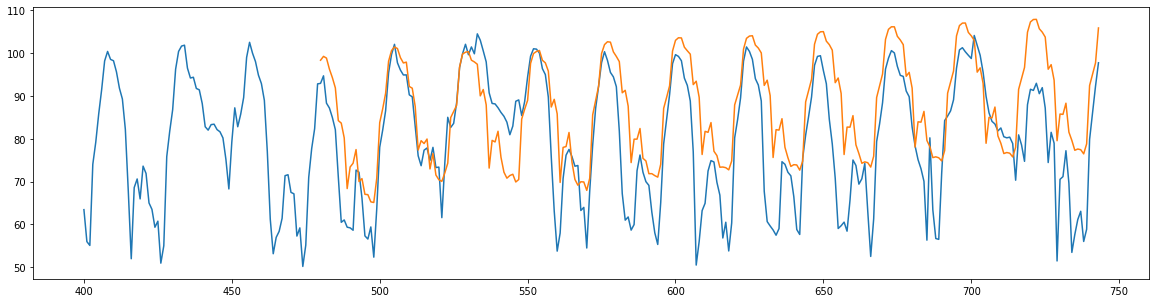

In [131]:

plt.figure(figsize=(20,5))
plt.plot(range(400,744), df["y"].iloc[400:])
plt.plot(range(480,744),predicted_value)
plt.show()